<a href="https://colab.research.google.com/github/cbermudez13/eel4815_final_coding_assignment/blob/main/group_1_problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

"""
This is a classification model based on NN. Here, we use only dense layers with MNIST dataset.   
Typically M <= N <= K. M is the number of classes. 
N is the number of features in each training or testing example. 
K is the number of units in each of the hidden layers. This number need not be fixed for both layers.

For classification of MNIST, M=10.  
"""

'\nThis is a classification model based on NN. Here, we use only dense layers with MNIST dataset.   \nTypically M <= N <= K. M is the number of classes. \nN is the number of features in each training or testing example. \nK is the number of units in each of the hidden layers. This number need not be fixed for both layers.\n\nFor classification of MNIST, M=10.  \n'

In [57]:
number_of_features = 28*28
number_of_units_in_hidden_layer = 100

#### load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [58]:
#### building the input vector from the 28x28 pixels

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizing the data
x_train /= 255
x_test /= 255

x_train = x_train.reshape(60000,784,1)
x_test  = x_test.reshape(10000,784,1)

In [59]:
# one-hot encoding (OHE)
y_train_OHE = []
for label in y_train:
    all_zero_temp , all_zero_temp[label] = 10*[0],1.0
    y_train_OHE.append(all_zero_temp)
y_train_OHE = np.asarray(y_train_OHE)

y_test_OHE = []
for label in y_test:
    all_zero_temp = 10*[0]
    all_zero_temp[label] = 1.0
    y_test_OHE.append(all_zero_temp)
y_test_OHE = np.asarray(y_test_OHE)


In [60]:
#### Construct the NN classification model


In [61]:
def create_model1(loss,optimizer,number_of_units_in_hidden_layer):
    NN_classification_model = tf.keras.Sequential()

    layer = layers.Reshape((784,), input_shape=(784,1))
    NN_classification_model.add(layer)

    # define layer
    hidden_layer_1 = layers.Dense(units=number_of_units_in_hidden_layer,input_shape=(784,), activation='relu')
    # add layer to the model
    NN_classification_model.add(hidden_layer_1)
    # define layer
    output_layer = layers.Dense(units=10, activation='softmax')
    # add layer to the model
    NN_classification_model.add(output_layer)
    NN_classification_model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])

    return NN_classification_model

# Cross entropy and Adam

In [62]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
NN_model = create_model1(loss,optimizer,number_of_units_in_hidden_layer)
model1= NN_model.fit(x_train, y_train_OHE, epochs=40, batch_size = 100, verbose=1,validation_data=(x_test, y_test_OHE))

Epoch 1/40
600/600 [==============================] - 2s 3ms/step - loss: 0.3526 - accuracy: 0.9028 - val_loss: 0.1965 - val_accuracy: 0.9453
Epoch 2/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1708 - accuracy: 0.9510 - val_loss: 0.1472 - val_accuracy: 0.9574
Epoch 3/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1251 - accuracy: 0.9638 - val_loss: 0.1161 - val_accuracy: 0.9664
Epoch 4/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0993 - accuracy: 0.9717 - val_loss: 0.1000 - val_accuracy: 0.9713
Epoch 5/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0795 - accuracy: 0.9771 - val_loss: 0.0905 - val_accuracy: 0.9722
Epoch 6/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0671 - accuracy: 0.9805 - val_loss: 0.0814 - val_accuracy: 0.9747
Epoch 7/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0569 - accuracy: 0.9834 - val_loss: 0.0783 - val_accuracy: 0.9761
Epoch 

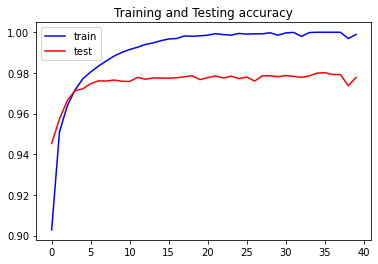

In [63]:
import matplotlib.pyplot as plt

accuracy = model1.history['accuracy']
val_accuracy = model1.history['val_accuracy']

plt.plot(accuracy,'b', label='Training accuracy')
plt.plot(val_accuracy, 'r' ,label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

# cross entropy and SGD

In [64]:
loss = 'categorical_crossentropy'
optimizer = 'sgd'
NN_model = create_model1(loss,optimizer,number_of_units_in_hidden_layer)
model2= NN_model.fit(x_train, y_train_OHE, epochs=40, batch_size = 100, verbose=1,validation_data=(x_test, y_test_OHE))

Epoch 1/40
600/600 [==============================] - 2s 3ms/step - loss: 1.0522 - accuracy: 0.7533 - val_loss: 0.5637 - val_accuracy: 0.8695
Epoch 2/40
600/600 [==============================] - 2s 3ms/step - loss: 0.4930 - accuracy: 0.8756 - val_loss: 0.4147 - val_accuracy: 0.8948
Epoch 3/40
600/600 [==============================] - 2s 3ms/step - loss: 0.4027 - accuracy: 0.8912 - val_loss: 0.3615 - val_accuracy: 0.9034
Epoch 4/40
600/600 [==============================] - 2s 3ms/step - loss: 0.3621 - accuracy: 0.8997 - val_loss: 0.3324 - val_accuracy: 0.9091
Epoch 5/40
600/600 [==============================] - 2s 3ms/step - loss: 0.3365 - accuracy: 0.9053 - val_loss: 0.3136 - val_accuracy: 0.9132
Epoch 6/40
600/600 [==============================] - 2s 3ms/step - loss: 0.3181 - accuracy: 0.9103 - val_loss: 0.2980 - val_accuracy: 0.9164
Epoch 7/40
600/600 [==============================] - 1s 2ms/step - loss: 0.3035 - accuracy: 0.9147 - val_loss: 0.2859 - val_accuracy: 0.9190
Epoch 

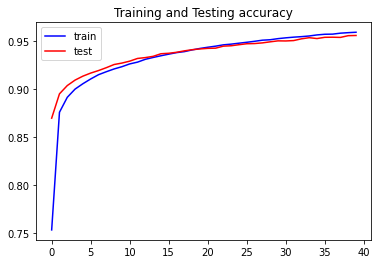

In [65]:
import matplotlib.pyplot as plt

accuracy = model2.history['accuracy']
val_accuracy = model2.history['val_accuracy']

plt.plot(accuracy,'b', label='Training accuracy')
plt.plot(val_accuracy, 'r' ,label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

# MSE and Adam

In [66]:
loss = 'mse'
optimizer = 'adam'
NN_model = create_model1(loss,optimizer,number_of_units_in_hidden_layer)
model3= NN_model.fit(x_train, y_train_OHE, epochs=40, batch_size = 100, verbose=1,validation_data=(x_test, y_test_OHE))

Epoch 1/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0156 - accuracy: 0.8993 - val_loss: 0.0086 - val_accuracy: 0.9441
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.0076 - accuracy: 0.9524 - val_loss: 0.0065 - val_accuracy: 0.9583
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9646 - val_loss: 0.0056 - val_accuracy: 0.9640
Epoch 4/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9722 - val_loss: 0.0050 - val_accuracy: 0.9669
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 0.9773 - val_loss: 0.0045 - val_accuracy: 0.9709
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9810 - val_loss: 0.0046 - val_accuracy: 0.9695
Epoch 7/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0028 - accuracy: 0.9835 - val_loss: 0.0039 - val_accuracy: 0.9746
Epoch 

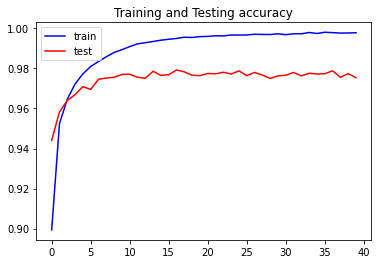

In [67]:
import matplotlib.pyplot as plt

accuracy = model3.history['accuracy']
val_accuracy = model3.history['val_accuracy']

plt.plot(accuracy,'b', label='Training accuracy')
plt.plot(val_accuracy, 'r' ,label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

# MSE and SGD

In [68]:
loss = 'mse'
optimizer = 'sgd'
NN_model = create_model1(loss,optimizer,number_of_units_in_hidden_layer)
model4= NN_model.fit(x_train, y_train_OHE, epochs=40, batch_size = 100, verbose=1,validation_data=(x_test, y_test_OHE))

Epoch 1/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0901 - accuracy: 0.1565 - val_loss: 0.0887 - val_accuracy: 0.2110
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.2607 - val_loss: 0.0857 - val_accuracy: 0.3075
Epoch 3/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0841 - accuracy: 0.3431 - val_loss: 0.0823 - val_accuracy: 0.3797
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.4177 - val_loss: 0.0787 - val_accuracy: 0.4566
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.4875 - val_loss: 0.0748 - val_accuracy: 0.5205
Epoch 6/40
600/600 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.5459 - val_loss: 0.0706 - val_accuracy: 0.5755
Epoch 7/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0687 - accuracy: 0.5927 - val_loss: 0.0661 - val_accuracy: 0.6141
Epoch 

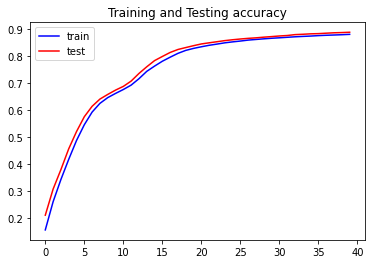

In [70]:
import matplotlib.pyplot as plt

accuracy = model4.history['accuracy']
val_accuracy = model4.history['val_accuracy']

plt.plot(accuracy,'b', label='Training accuracy')
plt.plot(val_accuracy, 'r' ,label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

# Cross Entropy and SGD seem to produce the best performance since the training and testing accuracy is best. The model of with MSE and SGD might produce better accuracy but the data might be overfitting so it might not be the best model to chose for performance on unseen validation data. 